# Support Vector Machine

``` 
Support Vector Machine is a powerful machine learning algo that is capable of performing linear and non-linear classification, regression and even outlier detection. 
It is suitable for small/medium size data classification 
``` 

#### 1. Linear SVM Classification 
``` 
Classes that can be clearly separated via a line makes data linearly separable. 
```

In [18]:
from sklearn.svm import SVC 
from sklearn import datasets

# load iris dataset 
iris = datasets.load_iris()

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
# get the petal length and width 
X = iris['data'][:, (2,3)]
y = iris['target']

In [22]:
# get the sentosa or versicolor flowers 
sentosa_or_versicolor = (y==0) | (y==1)

# get the sentosa or versicolor details only 
X = X[sentosa_or_versicolor]
y = y[sentosa_or_versicolor]

In [23]:
float('inf')

inf

In [24]:
# create a SVM classifier 
svm_clf = SVC(kernel="linear", C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

``` 
Creating bad model 
```

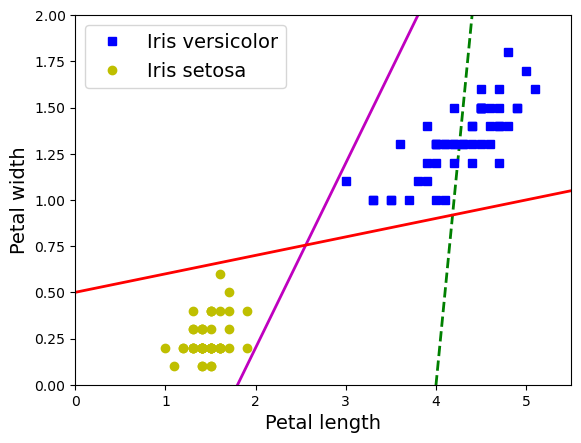

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

# create 200 evenly spaced points between 0 and 5.5
x0 = np.linspace(0, 5.5, 200)

# make line segments 
pred_1 = 5 * x0 - 20 
pred_2 = x0 - 1.8 
pred_3 = 0.1 * x0 + 0.5

# create subplots 
# fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# plt.sca(axes[0])

# create green dashed line - bad decision boundary 
plt.plot(x0, pred_1, "g--", linewidth=2)

# create magenta line classifying versicolor and sentosa 
plt.plot(x0, pred_2, "m-", linewidth=2)

# create red line classifying versicolor and sentosa 
plt.plot(x0, pred_3, "r-", linewidth=2)

# plot the points for versivolor in blue squares (versricolor y == 1)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")

# plot the points for sensotsa in yellow circles (sentosa y == 0)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")

# lable the x and y axis 
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

``` 
In the bad model we can clearly it is trying to classify 3 possible classes. However, green dashed decision boundary is so bad it cannot even distinguish 2 classes properly. 
The hard lines in red and magenta are classifying the data properly but decision boundaries are so close; that during training may perform well but may fail when new instances are provided 
```

``` 
Creating SVM model graph
``` 

In [27]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):

    # get model's coefficient and intercept 
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1

    # create 200 evenly spaces points between xmin and xmax 
    x0 = np.linspace(xmin, xmax, 200)

    # get the decision boundary values
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # set margin 
    margin = 1/w[1]

    # create gutterlines representing street 
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # get support vectors (points on the edge of the street)
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


(np.float64(0.0), np.float64(5.5), np.float64(0.0), np.float64(2.0))

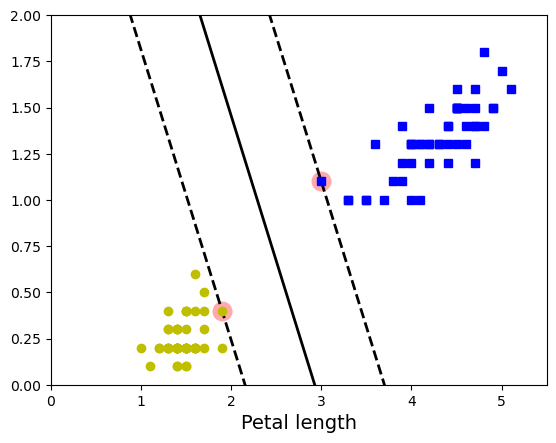

In [28]:
# for subplot 2 
# plt.sca(axes[1])

# set min=0 and max=5.5 to generate evenly spaced points 
plot_svc_decision_boundary(svm_clf, 0, 5.5)

# plot points for vesricolor in blue square (y==1)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

# plot points for sentosa in yellow circles (y==0)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

``` 
Here we can see the classes are separated properly by straight solid line. This is the decisionb boundary. 
It not only separates two classes but also stay far away from closest training instance possible. 
The classifier here is trying to fit max possible street (represented by dashed lines) b/w classes - this called LARGE MARGIN CLASSIFICATION
Also notice more training daa will not impact the decision boundary as it is determined by instances located at the edge of street - these are called SUPPORT VECTORS 

NOTE - SVM classifier is sensitive to feature scaling 

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

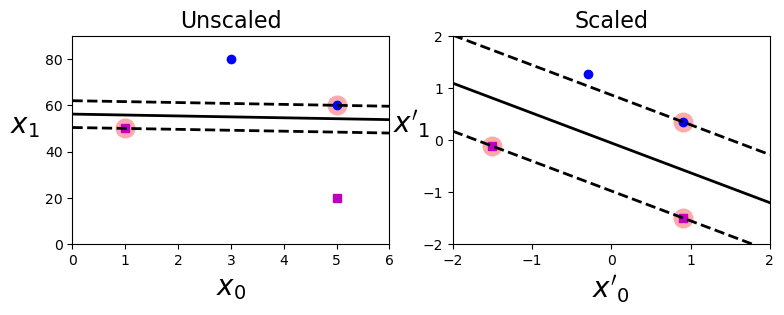

In [29]:
# take a array of points for petal length and width 
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)

# mark first two as sentosa and remaining two as versicolor 
ys = np.array([0, 0, 1, 1])

# create SVC classifier model and train w/o scaling 
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# plot boundary 
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# scale X value before training 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# provide the scaled input to classifier model 
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# plot graph for scaled input
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

``` 
SVM is sensitive to feature scaling as you can see the points on y axis are of higher scale than X axis. The widest possible street is along the X-axis (Left plot). 
However, when features are scaled the widest possible street and decision boundary looks much better (plot 2)
```
```

#### 2. Soft Margin classification 

``` 
If we strictly impose all instances must be off the street. This is called HARD MARGIN CLASSIFICATION. 
Problem with hard margin classifications are - 
    a. Works only with linearly separable data 
    b. sensitive to outliers 

If there is an outlier it will be impossible find the hard margin

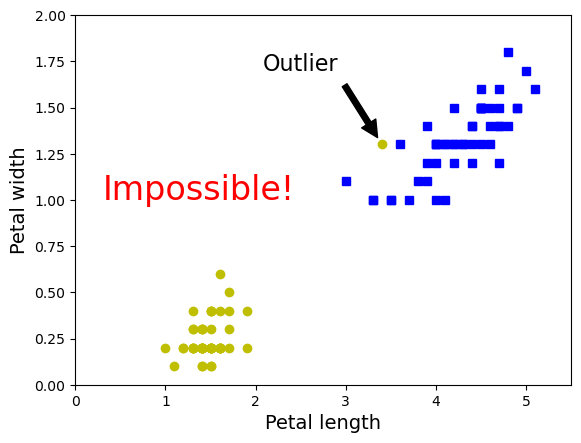

In [30]:
# Hard margin example 

# create some outlier instances 
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# add to existing data 
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# create linear svc classifier with C=10**9 (hyper parameter for SVC)
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

# plot the points and indicate due to hard margin it is impossible to create decision boundary
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

``` 
Considering this Objective is to find good balance between keeping street as large as possible and limit the margin voilations i.e. if instances end up in the middle of the street or even wrong side it is acceptable. This is called SOFT MARGIN CLASSIFICATION

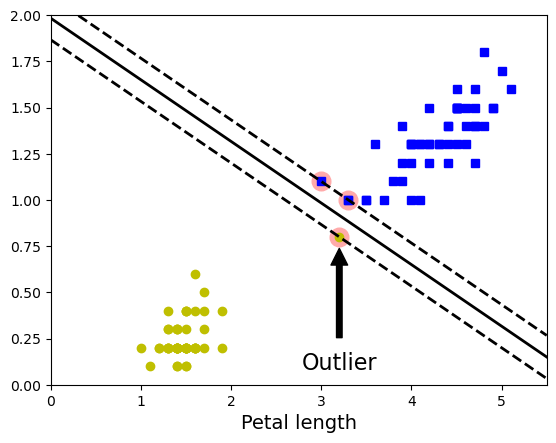

In [31]:
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")

plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

``` 
The above is example of model that may not be able to generalize data well 
```

In [32]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load iris dataset and and select only virginica flower set 
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# perform feature scaling and set SVM hyperparameter  C=1; i.e. wider street 
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [33]:
# predict a value 
svm_clf.predict([[5.5, 1.7]])

array([1.])

```
the classifier is tellign the 5.5 cm petal length and 1.7cm petal width is virginica flower

In [34]:
# now let's create two models with C=1 and C=100 i.e. C=1 -> wider street and C=100 narrow street 
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [35]:
# get the intercept and coef 
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

# get the weigths 
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

# set the weights 
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

# get support vectors 
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(np.float64(4.0), np.float64(5.9), np.float64(0.8), np.float64(2.8))

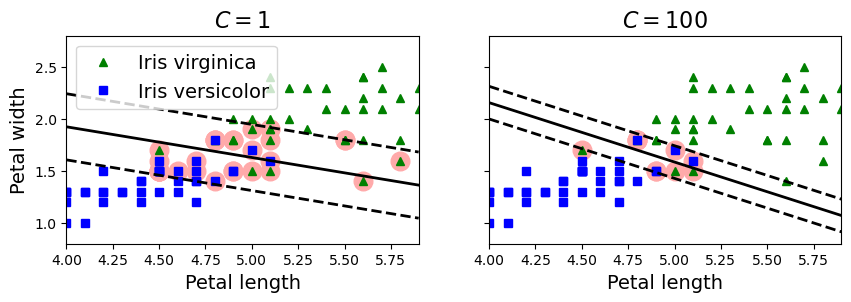

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

### 3. Non Linear SVM

``` 
Linear SVM work well in most of the linear seperable datasets. However there are many datasets that are not linearly separable. 
One way to handle such case is to add more feature such as polynomial feature. 
In below diagram the dataset is linearly not separable at left but when we add X^2 feature, the dataset has become linearly separable
```

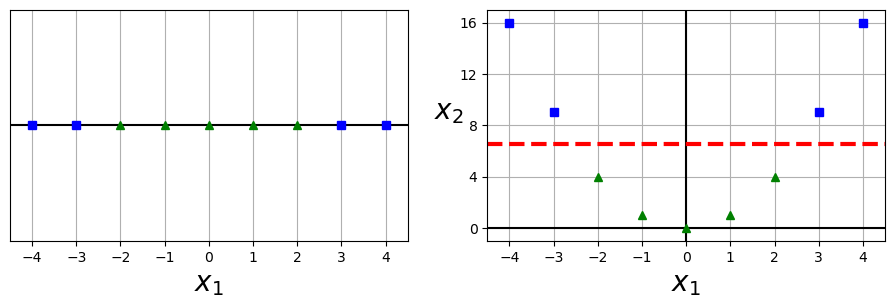

In [38]:
# create points between -4 and 4 
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# add x^2 feature
X2D = np.c_[X1D, X1D**2]

# add labels 
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# plot 
plt.figure(figsize=(10, 3))

# plot linearly non separable graph
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

## intentionally set y=0 using np.zeroes on the graph 
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

# plot linearly seapable after adding x^2 
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

``` 
make moon data
```

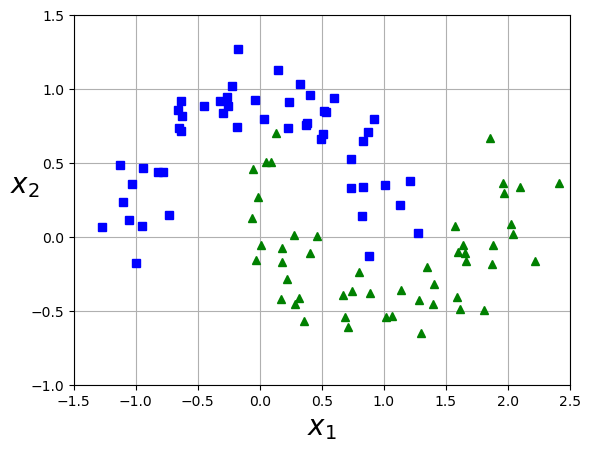

In [39]:
from sklearn.datasets import make_moons

# get X and y values form make moons 
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# plot this moon dataset on 
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
X[:10]

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445]])

``` 
using make_moon dataset and using degree=3 and crete decision boundaries

In [40]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# add polynomial feature of degree=3 and then scale and pass to SVC classifier 
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

# train model using moon dataset 
polynomial_svm_clf.fit(X, y)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

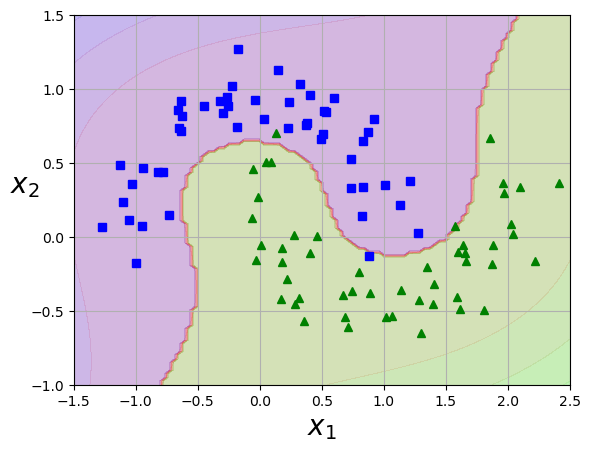

In [ ]:
def plot_predictions(clf, axes):

    # create 100 datapoints between -1.5 to 2.5 
    x0s = np.linspace(axes[0], axes[1], 100)

    # create 100 datapoints between -1 to 1.5 
    x1s = np.linspace(axes[2], axes[3], 100)

    # create meshgrid 
    x0, x1 = np.meshgrid(x0s, x1s)

    # create X array with 
    X = np.c_[x0.ravel(), x1.ravel()]

    # predict the values
    y_pred = clf.predict(X).reshape(x0.shape)

    # get the classifier's decision function 
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # create contour for predicted values 
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

    # create contour for decision scores 
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# call plot prediction using the scaled degree=3 linear SVC model 
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

#### 4. Polynomial Kernel

```
adding polynomial feature is simple and work great with all algo. however adding polynomial features everytime to very complex dataset with high polynomial degree will create lots of features and mke the model slow.. This is called Combination Explosion... 

In SVM we can apply a trick called KERNEL TRICK, which makes possible to get same result if you had added many polynomial features w/o actually adding them. 
```

In [49]:
from sklearn.svm import SVC

# create polynomial kernel pipeline; instead of using linear SVC use kernel="poly". coef0 is hyperparameter conrtolling how much is model influenced by high high degree polynomial
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

# train on moon dataset 
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [50]:
# create polynomial kernel pipeline; instead of using linear SVC use kernel="poly" and degree=10 this time 
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

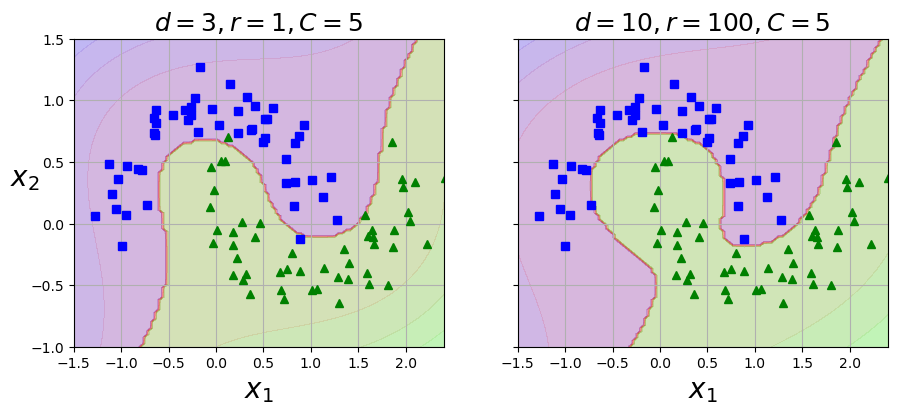

In [51]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# plot for values for hyperparameter coef0=1 (denoted as r) and degree=3
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

# plot for values for hyperparameter coef0=100 (denoted as r) and degree=100
plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

#### 5. Similarity Features 
``` 
Non linear problems can also be tackled with similarity function. It tell how much an instance resembles to a particular landmark. 
This is done using Gaussian Radial Bias Function (RBF) - 
```
$\phi (x,l) = \exp ({-\gamma || x - l ||^2})$

In [52]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [53]:
# set gamma value = 0.3 
gamma = 0.3

# create 200 evenly spaced points between -4.5 and 4.5 
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)

# calculate RBF for 2 landmarks; one at -2 and another at 1 
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# create set of gaussian score 
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]

# add labels 
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

In [56]:
XK

array([[3.01194212e-01, 5.53084370e-04],
       [7.40818221e-01, 8.22974705e-03],
       [1.00000000e+00, 6.72055127e-02],
       [7.40818221e-01, 3.01194212e-01],
       [3.01194212e-01, 7.40818221e-01],
       [6.72055127e-02, 1.00000000e+00],
       [8.22974705e-03, 7.40818221e-01],
       [5.53084370e-04, 3.01194212e-01],
       [2.03995034e-05, 6.72055127e-02]])

In [55]:
yk

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

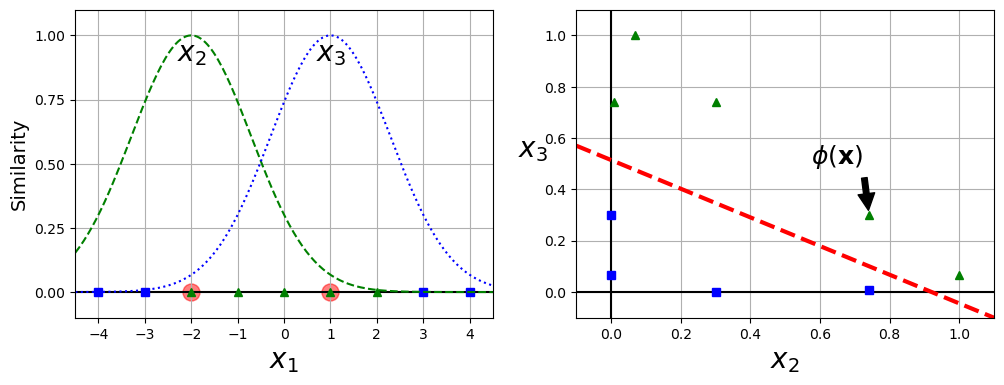

In [95]:
plt.figure(figsize=(10.5, 4))

# create first subplot 
plt.subplot(121)
plt.grid(True, which='both')

# create horizontal line on X-axis 
plt.axhline(y=0, color='k')

# create scatter plot for points on -2 and 1 on x-axis. Incircle them in red
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")

# add points on X axis and intentionally set y=0 for them 
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")

# plot points between -4.5 and +4.5 against RBF points calculated - these are going to be bell shaped 
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")

# set ticks on y axis
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)

# annotate X on the graph
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# create second subplot 
plt.subplot(122)
plt.grid(True, which='both')

# create horizontal and vertical lines 
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# put the points on graph (see the y values are provided this time)
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")

# create x2 and x3 lables 
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)

# annotate similarity score 
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [59]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


#### 6. Gaussian RBF Kernel 

In [60]:
# create  SVM classifier using RBF as kernel 
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

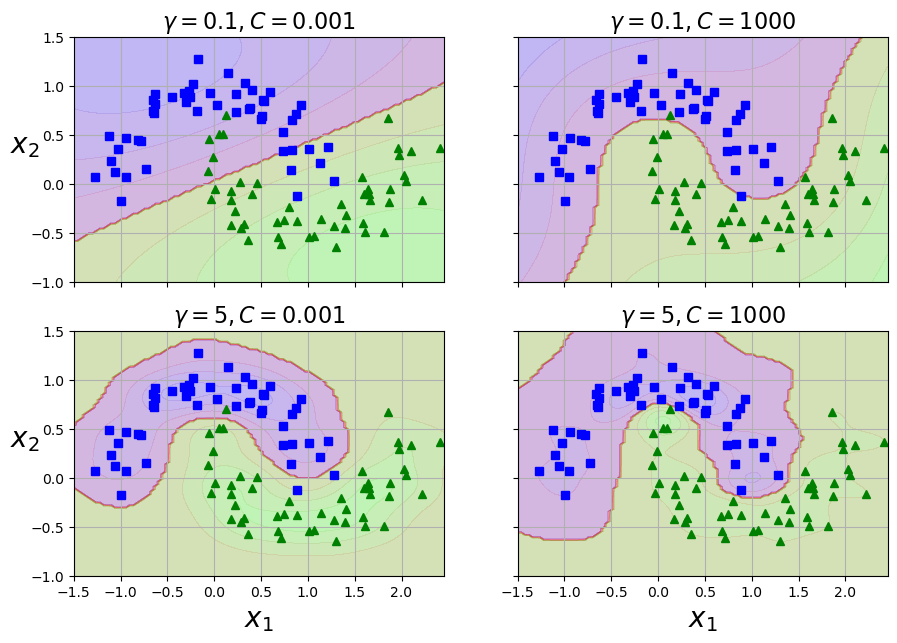

In [62]:
from sklearn.svm import SVC

# provide gamma and C values 
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

# create a combination of gamma and C values hyperparameters 
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# list of svc classifiers 
svm_clfs = []

# iterate over possible hyperparameter values selected 
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    
    # fit the classifier with data and append model to a list
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# create 2x2 subplots (4 combinations of hyperparameters and therefore 4 models)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

# iterate over models created 
for i, svm_clf in enumerate(svm_clfs):

    # set the current axes value to ax 
    plt.sca(axes[i // 2, i % 2])

    # plot predictions from the model 
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])

    # plot the dataset 
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

    # get the gamma and C values 
    gamma, C = hyperparams[i]

    # plot the graph
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

``` 
As we can see increasing gamma is makes bell shaped narrower. As a result each instance range of influence is smaller: the decision boundary ends up being more irregular, wiggling around the individual instance. 
Small gamma value makes bell shape wider. 

Gamma acts as regularization hyperparameter. if your model is overfitting, you should reduce it; if underfitting you should increase it (similar to hyper parameter C).
``` 

#### 7. SVM Regression 

``` 
SVM can handle classification and regression. 
Objective of SVM classification was to have largest street possible between classes with minimal margin voilations 
SVM regression objective is just opposite - to have all instances within the street with minimal margin voilations 
```
width of street is controlled using hyperparameter $\epsilon$. More is the value wider is the street.
<br> 
NOTE - adding more instances within margin is not going to affect model's prediction. Thus the SVM REgression is called $\epsilon$ insensitive

In [97]:
# create a list of random numbers for equation y = 4 + 3X + bias
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [98]:
from sklearn.svm import LinearSVR

# crate the linear regression model of SVC with epsilon value=1.5
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [99]:
# create 2 regression models one with epsilon=1.5 (wider street) and other with 0.5 (narrow street)
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# find the support vectors (points on the edge of the street)
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# get the support vector values 
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# predict the value for x=1
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.52640746])

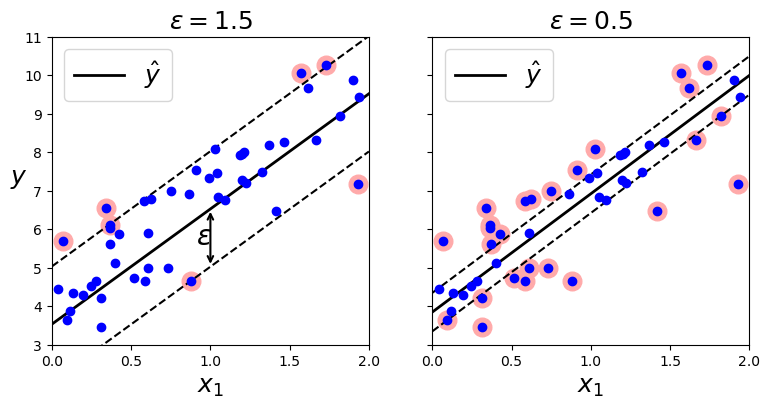

In [100]:
# plot the SVM regression graph 
def plot_svm_regression(svm_reg, X, y, axes):

    # get the 100 evenly spaces values between 2 input values 
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)

    # predict for these values 
    y_pred = svm_reg.predict(x1s)

    # plot the decision boundary
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")

    # get the street depth +- of epsilon 
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")

    # create the support vector points with red outline 
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')

    # plot all points in blue 
    plt.plot(X, y, "bo")

    # provide labels, legends
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

# create 2 subplots 
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# select first subplot 
plt.sca(axes[0])

# plot SVM regression for first model with epsilon=1.5
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)

# annotate epsilon value on the graph 
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

# plot second grpah for epsilon=0.5
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non Linear Regression 

In [101]:
# perform non linear regression using SVM for equation y=0.2 + 0.1X + 0.5X^2 + bias
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [102]:
from sklearn.svm import SVR

# create polynomial plot of degree=2; C=100 and epsilon=0.1 
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [103]:
from sklearn.svm import SVR

# create two regression models one with C=100 and another with C=0.01
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

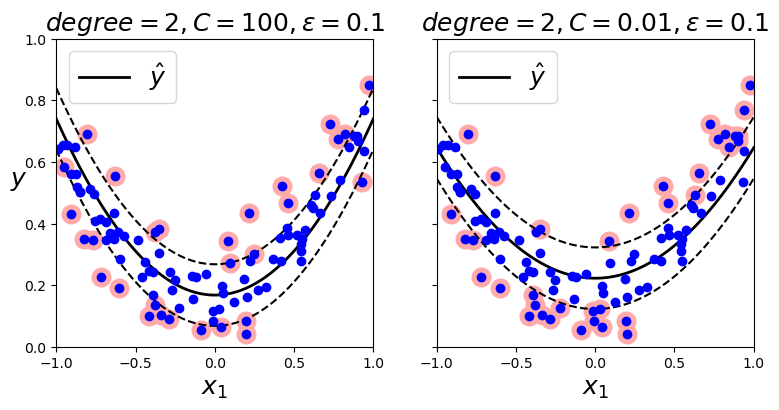

In [104]:
# plot the what are points included within the regression model 
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

``` 
Little regularization in left and more regularization in right plot
```

#### 8. Under the hood
We had seen the convention of putting model parameters in one vector $\theta$ including bias term $\theta_0$ and input feature weights from $\theta_1$ to $\theta_n$ and then adding bias term 1 to all instances. <br>
In SVM, the convention used is same but representation is more convinient and more common i.e. <br>
- bias term will be called b 
- feature weight vectos called w 
<br><br>
Linear SVM classifier model predics the calss of a new instance x by simply computing the decision function $W^Tx + b$<br>
$W^Tx + b = w_1x_1 + w_2x_2 + ... + w_nx_n + b$
<br>
If result is positive, predicted class $\^y$ is positive class (1) elase negative class (0)
<br><br>
Equation for Linear SVM classifier prediction: 

$\^y = { [0 \space if \space W^Tx+b < 0]\newline
[1 \space if \space W^Tx+b>=0 \ ] }$


NOTE - The code below are copy paste of what we have on github repo of book. These are not really needed. 

In [105]:
# load iris dataset and select petal length and widh and Virginica flower
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

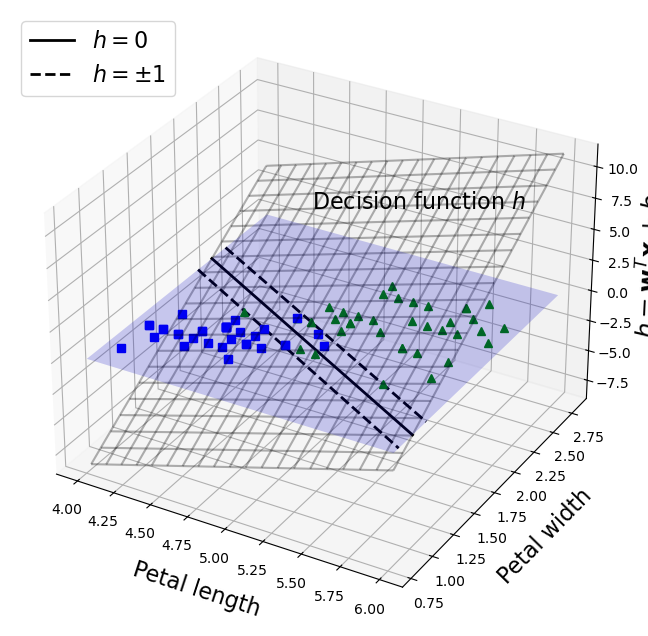

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# plot 3D decision 
def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):

    # get x1 values which are bound 
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])

    # get the X valyes in bound 
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]

    # create points between the bounds 
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)

    # crate boundaries 
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    
    # plot the grpah 
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    # ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

#### 9. Training Objective

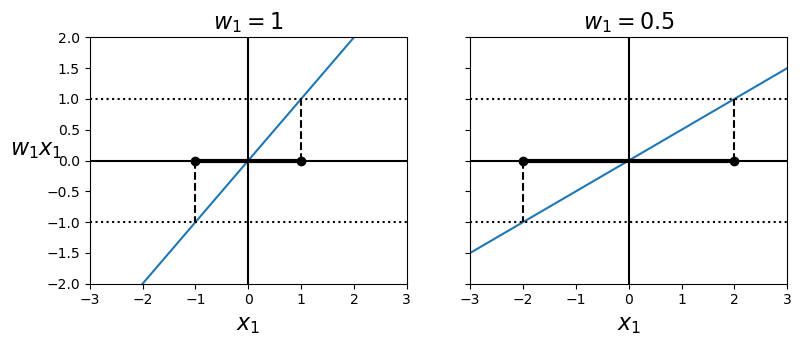

In [85]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])

# plot line for slope with w1 = 1 
plot_2D_decision_function(1, 0)
plt.sca(axes[1])

# plot line for slope with w1=0.5
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

#### 10. Hinge loss function 

In [86]:
from sklearn.svm import SVC
from sklearn import datasets

# load iris data and select virginca flower along with petal length and width
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

# create linear SVC classifer
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)
svm_clf.predict([[5.3, 1.3]])

array([1.])

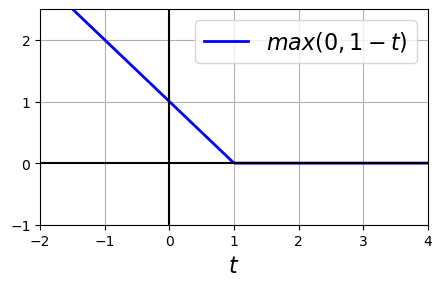

In [87]:
# create points 
t = np.linspace(-2, 4, 200)

# get hinge loss which is max of 0 or 1-t
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

#### 11. Extra Material 

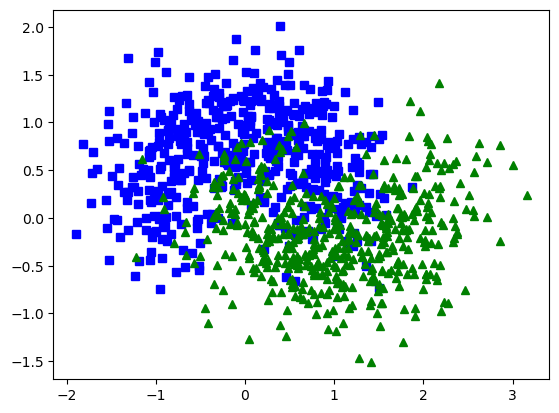

In [88]:
# get moon dataset 
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

[LibSVM]......................................
*.......................
*..............................................................
*...................................*.......................................................*
optimization finished, #iter = 212105
obj = -4447.997680, rho = 0.075931
nSV = 449, nBSV = 441
Total nSV = 449
0 0.1 0.12846016883850098
[LibSVM]................................................*..........................................................*..............*..............................................................*..................................................................*...........*
optimization finished, #iter = 258151
obj = -4448.479655, rho = 0.058653
1 0.01 0.1267240047454834
[LibSVM]nSV = 446, nBSV = 441
Total nSV = 446
...................................................*......*............................................................*..............................................................................*...............

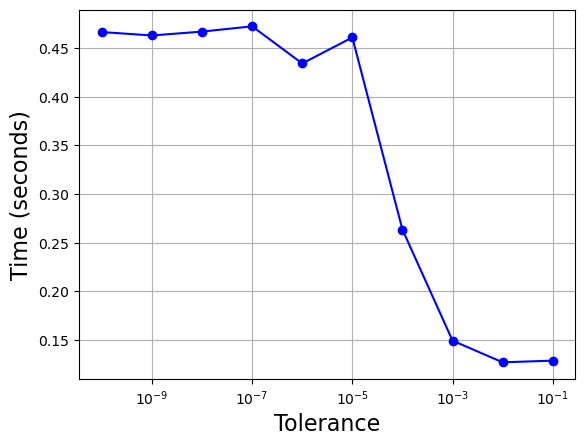

In [89]:
import time

# set toldererance 0.1 
tol = 0.1

# create list to store tolerance and time taken 
tols = []
times = []

# iterate over 10 times
for i in range(10):

    # create SVC polynomial classifier 
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    
    # gets start time 
    t1 = time.time()

    # fit the data to svm classifier
    svm_clf.fit(X, y)

    # get end time 
    t2 = time.time()

    # append the duration 
    times.append(t2-t1)

    # append the tolderance value 
    tols.append(tol)

    # print the iteration number, tolertance and durtation 
    print(i, tol, t2-t1)

    # divide the tolerance value 
    tol /= 10

# plot the time and tolerance values 
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

#### 12. Linear SVM Classifier implementation using Batch Gradient

In [106]:
# Training set
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [107]:
from sklearn.base import BaseEstimator

# create class for Linear SVC 
class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0
        
        m = len(X)
        t = y * 2 - 1  # -1 if y==0, +1 if y==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

In [108]:
C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

(np.float64(0.0), np.float64(60000.0), np.float64(0.0), np.float64(100.0))

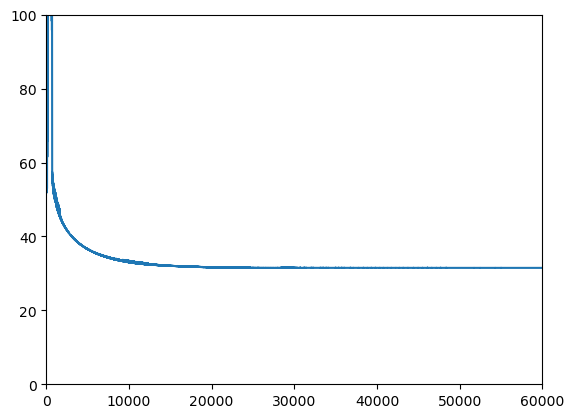

In [109]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [110]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


(np.float64(4.0), np.float64(6.0), np.float64(0.8), np.float64(2.8))

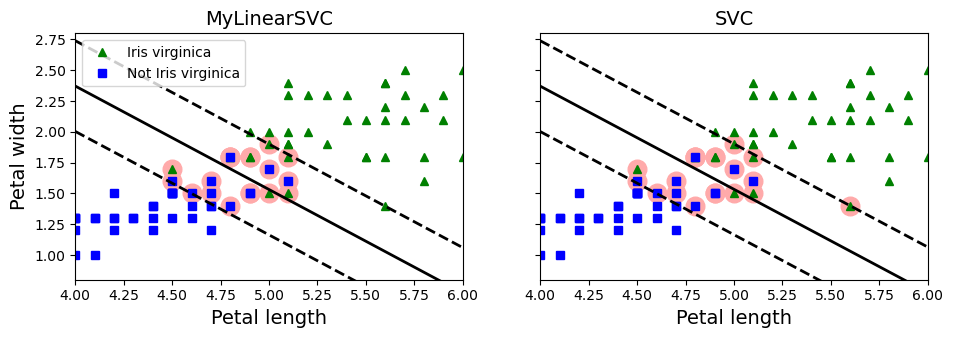

In [111]:
# compare linear SVC kernel with custom SVC 
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

[-12.52988101   1.94162342   1.84544824]


(np.float64(4.0), np.float64(6.0), np.float64(0.8), np.float64(2.8))

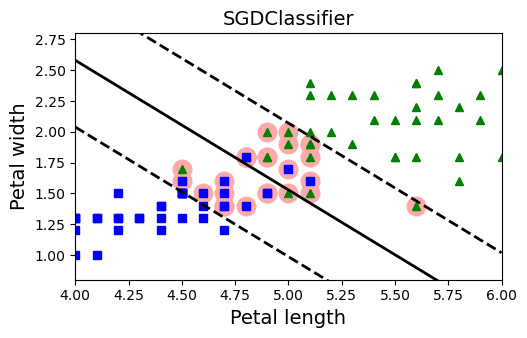

In [112]:
# using SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # -1 if y==0, +1 if y==1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

# Exercises

``` 
Q1. Fundamental idea benind Support Vector Machine
Ans: SVC tries separate classes with maximum possible distance using decision boundary. In other words, It creates a maximum possible street between classes with less marging error. 
With softmargin - SVC tries to compromise between widest possible distance between classes and perfectly separable classes. 

Q2. What are support vectors? 
Ans: Points that lie on edge of the street are called support vectors. the decision boundary is determined using support vectors. Any vector which are off the street has no impact on decision boundary.

Q3. Importance of scaling in SVC? 
Ans: SVM is sensitive to feature scaling. SVM tries to fit largest possible street between classes. So if training set is not scaled, the SVM tends to neglect small features.

Q4. Can SVM classifier output confidence score? What about probablity?
Ans. The SVM can outout the distance between instance and decision boundary, you can use this as confidence score. However, this score cannot be directly converted to estimation of class probablity. 
If you train SVM with probablity=True (during model creation), after training it will calibrate probablity using Logistic regression on SVM score (by training an additional 5 fold validation on training set). With this method, SVM will add predict_proba and predict_log_proba method to SVM. 

Q5. Should you use primal or dual form of SVM problem to train a model on training a model with millions of instances and hundereds of feature? 
Ans. Kernelized SVMs only uses DUAL FORM. 
This question is applicable to Linear SVM. Computational complexity of primal form of SVM problem is proportional to number of instance (say m). 
While Computational Complexity of dual form of SVM problem is propotional to m^2 and m^3. So if thera are million instances. Use PRIMAL FORM as dual form will be painfully slow.

Q6. When training the SVM model with RBF kernel but data seems to underfitting. Should you increase/decrease Gamma or C? 
Ans: If data is underfitting implies too much of regularization. To reduce regularization increase either Gamma or C or both.

#### Q8. Train linear SVC on linearly separable datasets. Train on SVC and SGDClassifie. Validate if they produce similar result

In [113]:
from sklearn import datasets

# take iris data and get petal length and petal width 
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# get sentosa or versicolor and set to 0 and 1 respectively. Since SVC works with Binary datasets 
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [114]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Create classifier  - LinearSVC, SVC with linear Kernel, SGD classifier
C = 5
alpha = 1 / (C * len(X))

# create classifiers 
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

# scale the input 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fir the data
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

# get the intercept and coefficient 
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


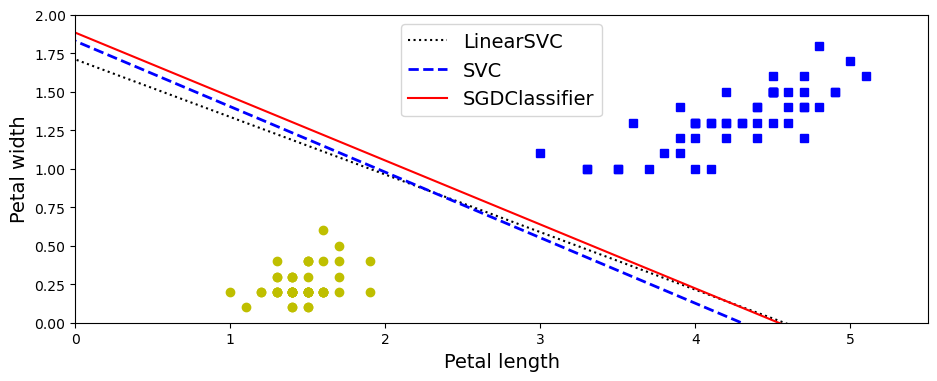

In [115]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

#### Q9. Create SVM classifier on MNIST dataset. Use One Vs Rest strategy as SVM is binary classifier. Tune small hyperparameter using small validation set to speed up the process. What is the accuracy reached? 

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# get MNIST dataset 
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# split the data to training and test set (the dataset is pre shuffled)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [117]:
# create Linear SVC model and fit the training data - this will automatically use OvR strategy
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [118]:
# to validate the accuracy; predict using training set and compare labels with prediction 
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9273833333333333

``` 
93% is good enough but lets check what would be the score when features are scaled

In [119]:
# using standard scaler - scale the input data first and then calculate the accuracy 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [120]:
# train another model with scaled data 
lin_clf_scaled = LinearSVC(random_state=42)
lin_clf_scaled.fit(X_train_scaled, y_train)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [121]:
# perform data prediction and calculate the accuracy score
y_pred = lin_clf_scaled.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9275

``` 
Let's create SVC model with RBF Kernel

In [122]:
# train the classifier using RBF kernel 
svm_clf_rbf = SVC(gamma="scale")
svm_clf_rbf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [123]:
# perform the prediction using scaled training data
y_pred = svm_clf_rbf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

``` 
Improve performance using hyperparameter

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# hyperparameter distributions 
param_distributions = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}

# perform randomized search to get the best classifier
rnd_search_cv = RandomizedSearchCV(svm_clf_rbf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.847490967837556, gamma=0.004375955271336428; total time=   0.4s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336428; total time=   0.4s
[CV] END ....C=5.847490967837556, gamma=0.004375955271336428; total time=   0.5s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235325; total time=   0.4s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235325; total time=   0.4s
[CV] END ....C=2.544266730893301, gamma=0.024987648190235325; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825554; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825554; total time=   0.4s
[CV] END ....C=2.199505425963898, gamma=0.009340106304825554; total time=   0.4s
[CV] END ......C=7.327377306009368, gamma=0.0432965650413362; total time=   0.4s
[CV] END ......C=7.327377306009368, gamma=0.0432965650413362; total time=   0.4s
[CV] END ......C=7.327377306009368, gamma=0.0432

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17a76e2d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1791f77d0>},
                   verbose=2)

In [125]:
# get the best estimator 
rnd_search_cv.best_estimator_

SVC(C=np.float64(3.8786881587000437), gamma=np.float64(0.001707601922934453))

In [126]:
# get the best score
rnd_search_cv.best_score_

np.float64(0.8599947252641863)

In [127]:
# fit the scaled data to best estimator 
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=np.float64(3.8786881587000437), gamma=np.float64(0.001707601922934453))

In [128]:
# perform data prediction and calculate accuracy score
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9978166666666667

``` 
Now run the best estimator on test data

In [129]:
# perform on test data 
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9717

In [130]:
# save all the models 
import joblib 
joblib.dump(lin_clf, 'OUTPUT/Chapter5/mnist_linear_svc.pkl')
joblib.dump(lin_clf_scaled, 'OUTPUT/Chapter5/mnist_linear_scaled_svc.pkl')
joblib.dump(svm_clf_rbf, 'OUTPUT/Chapter5/mnist_scaled_svc_rbf.pkl')
joblib.dump(rnd_search_cv.best_estimator_, 'OUTPUT/Chapter5/mnist_scaled_svc_best.pkl')

['OUTPUT/Chapter5/mnist_scaled_svc_best.pkl']

#### 10. SMV Regressor in California Housing Dataset

In [131]:
from sklearn.datasets import fetch_california_housing

# get the california housing dataset 
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [132]:
from sklearn.model_selection import train_test_split

# split the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler

# perform feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.svm import LinearSVR

# perform Linear regression
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [135]:
# calculate Mean squared error 
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948652

``` 
Check if the hyperparameters values are set 

In [136]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   3.7s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   3.6s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   3.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   3.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   3.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   3.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.1s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.2s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=   3.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=   3.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x179112110>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x178b0f7d0>},
                   random_state=42, verbose=2)

In [137]:
rnd_search_cv.best_estimator_

SVR(C=np.float64(4.745401188473625), gamma=np.float64(0.07969454818643935))

In [138]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

np.float64(0.5727388256100427)

In [139]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

np.float64(0.5929051928423786)